In [6]:
import pandas as pd
import csv
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('res/sales.csv', delimiter=';')
df['document_number'] = df['document_name'].apply(lambda x: int(x.replace(" ", "").split('№')[-1]))
df['document_type'] = df['document_name'].apply(lambda x: " ".join(x.split('№')[0].split()))
df['contrpartner_inn'] = df['contrpartner_inn'].astype(str).map(lambda x: x.strip('.0') if '.0' in x else 'nan')
# df['contrpartner_inn'] = temp.map(lambda x: x if len(x) == 10 else 'nan')
# TODO prepare contrpartner_inn, contrpartner_name groups
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139467 entries, 0 to 139466
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   contrpartner_name    139467 non-null  object 
 1   contrpartner_inn     139467 non-null  object 
 2   contrpartner_type    139457 non-null  object 
 3   contrpartner_status  139457 non-null  object 
 4   level_sale           139457 non-null  object 
 5   document_name        139467 non-null  object 
 6   document_date        139467 non-null  object 
 7   division             136314 non-null  object 
 8   warehouse            139467 non-null  object 
 9   warehouse_type       139467 non-null  object 
 10  manager_name         139467 non-null  object 
 11  supplier             138265 non-null  object 
 12  assortment_category  139467 non-null  object 
 13  standard             139419 non-null  object 
 14  steel_grade          139385 non-null  object 
 15  diameter         

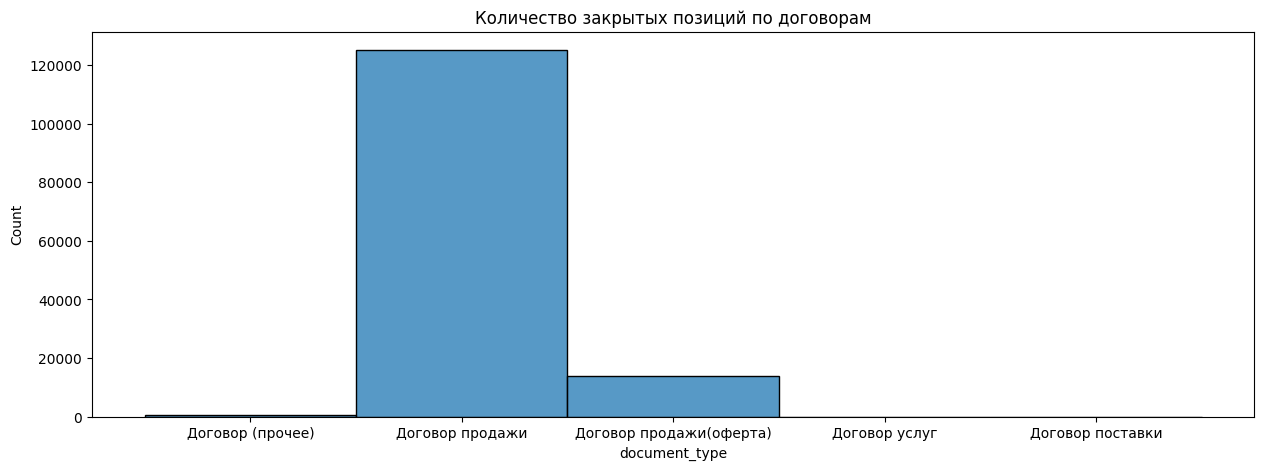

In [477]:
# Количество закрытых позиций по договорам

plt.figure(figsize=(15,5))

sns.histplot(df['document_type'])

# Добавление заголовка к графику  
plt.title("Количество закрытых позиций по договорам")  
# Отображение графика
plt.show()

In [430]:
# Количество закрытых позиций по договорам
df.groupby(['document_number'])['document_type'].count().sort_values(ascending=False)

document_number
886       3967
900       3274
1543      2492
1370      2161
860       2123
          ... 
470123       1
470210       1
470272       1
470275       1
69           1
Name: document_type, Length: 4019, dtype: int64

In [ ]:
# Тоннаж сделок по договорам
df.groupby('document_type')['tns'].sum().sort_values(ascending=False)

document_type
Договор продажи            588896.904
Договор продажи(оферта)     12576.256
Договор (прочее)             4679.045
Договор поставки                2.056
Договор услуг                   1.454
Name: tns, dtype: float64

In [ ]:
# Больше всего тоннажа
df.groupby(['contrpartner_inn', 'contrpartner_name'])['tns'].sum().sort_values(ascending=False)

contrpartner_inn  contrpartner_name        
7721040281        АО "МЕТАЛЛСЕРВИС"            39942.405
9725133847        АО "Компания Алгоритмика"    24170.989
7118018781        АО "Металлоторг"             21078.206
6678029946        ООО "Уралпромстрой"          20882.034
6674306564        ООО "УМПЦ"                   19391.036
                                                 ...    
7703429759        ООО "ТП Инжиниринг"              0.001
507407134         ООО "ТТК ВАСМИГ"                 0.001
781326295         ООО "НГС"                        0.000
745134313         ООО НПП "МЕТЧИВ"                -0.022
7460026427        ООО "ЭнергоСервис"              -0.661
Name: tns, Length: 4448, dtype: float64

In [ ]:
# Больше всего позиций
df.groupby(['contrpartner_inn', 'contrpartner_name'])['tns'].count().sort_values(ascending=False)

contrpartner_inn  contrpartner_name                                                                           
6674306564        ООО "УМПЦ"                                                                                      4126
7721040281        АО "МЕТАЛЛСЕРВИС"                                                                               3869
6678029946        ООО "Уралпромстрой"                                                                             3695
6685184251        ООО "Синарастройкомплект"                                                                       2467
7118018781        АО "Металлоторг"                                                                                2304
                                                                                                                  ... 
5406826333        ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ МЕТАЛЛУРГИЧЕСКАЯ ПРОИЗВОДСТВЕННАЯ КОМПАНИЯ «МАГНИТ»       1
5406800448        ООО  "СИБМЕТТОРГ"                     

In [ ]:
df.groupby(['contrpartner_inn', 'contrpartner_name'])

df2 = df[['contrpartner_inn', 'contrpartner_name']]
df2['contrpartner_name2'] = df2['contrpartner_name']
t = pd.DataFrame(df2[df2['contrpartner_inn'] != 'nan'].groupby(['contrpartner_name', 'contrpartner_inn']).count().sort_values(by='contrpartner_name2')[::-1])[:100]
inns = t.reset_index()['contrpartner_inn']

/tmp/ipykernel_909430/578669042.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['contrpartner_name2'] = df2['contrpartner_name']


In [ ]:
# Get company information with FNS-API

# import requests
# import os

# s = requests.Session()
# key = "034a9b037ca33b89fedf72f9e89b1f3511ac21f7"

# parsed_inns = [e.strip('.json') for e in os.listdir('res/companies/')]

# for inn in inns:
#     if inn in parsed_inns: continue
#     resp = requests.get(f"https://api-fns.ru/api/egr?req={inn}&key={key}")

#     print(resp)

#     resp_json = json.loads(resp.text)
#     import json
#     with open(f'res/companies/{inn}.json', 'w', encoding='utf-8') as f:
#         json.dump(resp_json['items'][0], f, ensure_ascii=False, indent=4)

In [ ]:
# import pathlib
# companies_files = [e for e in pathlib.Path('res/companies/').resolve().iterdir()]

# companies = {}
# for fname in companies_files:
#     with open(fname, 'r') as f:
#         j = json.load(f)
#         companies[j['ЮЛ']['ИНН']] = j

In [ ]:
# with open('res/companies.json', 'w') as f:
#     json.dump(companies, f, ensure_ascii=False, indent=4)

In [ ]:
# Get data from https://newsdata.io

# import requests
# from datetime import datetime, timedelta
# import pandas as pd

# def get_news_df(company_name, language):
#     # API URL 
#     url = "https://newsdata.io/api/1/news"
#     api_key = "pub_b7faa1246fe14987b8963b1b3ec6c0e6"
#     # Параметры запроса
#     params = {
#         "apikey": api_key,
#         "q": company_name,
#         "language": language,
#     }
    
#     # Запрашиваем массив данных по новостям
#     response = requests.get(url, params=params)
#     data = response.json()
    
#     # Получаем список новостей
#     news = data.get("results", [])
    
#     # Преобразовываем в DataFrame
#     df = pd.DataFrame([{
#         "title": item.get("title"),
#         "description": item.get("description"),
#         "source": item.get("source_id"),
#         "publication_date": item.get("pubDate"),
#         "link": item.get("link")
#     } for item in news])
    
#     return df

# company_name = "ТМК"
# language = "ru"

# df = get_news_df(company_name, language)
# display(df)

In [ ]:
# Get data from perplexity

# import requests

# api_key = ""  # Лучше хранить ключ в переменных окружения!
# base_url = "https://api.perplexity.ai/chat/completions"

# input = "Планирующиеся проекты застройщика Синара Девелопмент для потенциальной реализации металлопродукции компании ТМК."

# headers = {
#     "Authorization": f"Bearer {api_key}",
#     "Content-Type": "application/json"
# }
# data = {
#     "model": 'sonar-pro',
#     "messages": [
#             {
#               "role": 'system',
#               "content": "Ты — ассистент, который отвечает исключительно кратко, структурировано и по делу. " + 
#               "Отвечай тезисами (не более 5 пунктов), без объяснений и размышлений. Не используй нумерацию и не пиши служебные теги."
#             },
#             {
#               "role": 'user',
#               "content": input +
#                 "Пожалуйста, дай ответ в формате коротких тезисов, не более 5 пунктов, без дополнительных комментариев, без нумерации и тегов."
#             }
#         ],
#     }

# response = requests.post(base_url, headers=headers, json=data)
# if response.status_code == 200:
#     print(response.json())
# else:
#     print("Ошибка:", response.text)


{'id': '780df6d4-9a20-4239-a762-db533f51986e', 'model': 'sonar-pro', 'created': 1753401840, 'usage': {'prompt_tokens': 148, 'completion_tokens': 222, 'total_tokens': 370, 'search_context_size': 'low'}, 'citations': ['https://finance.rambler.ru/business/46568044-tmk-i-gruppa-sinara-podveli-itogi-uchastiya-v-pmef-2021-novye-vyzovy-ozhidaniya-i-vozmozhnosti/', 'https://www.hse.ru/data/2022/08/30/1695869743/%D0%91%D0%9E%D0%92%2044-45%202022.pdf', 'https://www.akm.ru/news/rosneft_i_tmk_dogovorilis_o_postavke_metalloproduktsii_dlya_proekta_vostok_oyl/', 'https://newpressa.pressa.ru/media/private/ekspert/2020/50-2020/raw_issue/ekspert-2020-50-2020.pdf', 'https://www.rosneft.ru/press/releases/item/206517/'], 'search_results': [{'title': 'ТМК и Группа Синара подвели итоги участия в ПМЭФ-2021', 'url': 'https://finance.rambler.ru/business/46568044-tmk-i-gruppa-sinara-podveli-itogi-uchastiya-v-pmef-2021-novye-vyzovy-ozhidaniya-i-vozmozhnosti/', 'date': '2021-06-05', 'last_updated': '2025-01-16'}, 

In [ ]:
# import json
# with open('resp2.json', 'w') as f:
#     json.dump(response.json(), f, ensure_ascii=False, indent=4)